In [46]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [47]:
# Read the data
train_df = pd.read_csv("Dataset/SoftwareDefectDataset/train.csv", encoding="utf8")
test_df = pd.read_csv("Dataset/SoftwareDefectDataset/test.csv", encoding="utf8")
original_df = pd.read_csv("Dataset/SoftwareDefectDataset/jm1.csv", encoding="utf8")
# Drop the unnecessary columns
train_df.drop(columns=["id"], inplace=True)
train_df.shape, test_df.shape

((101763, 22), (67842, 22))

In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loc                101763 non-null  float64
 1   v(g)               101763 non-null  float64
 2   ev(g)              101763 non-null  float64
 3   iv(g)              101763 non-null  float64
 4   n                  101763 non-null  float64
 5   v                  101763 non-null  float64
 6   l                  101763 non-null  float64
 7   d                  101763 non-null  float64
 8   i                  101763 non-null  float64
 9   e                  101763 non-null  float64
 10  b                  101763 non-null  float64
 11  t                  101763 non-null  float64
 12  lOCode             101763 non-null  int64  
 13  lOComment          101763 non-null  int64  
 14  lOBlank            101763 non-null  int64  
 15  locCodeAndComment  101763 non-null  int64  
 16  un

In [49]:
# Check missing values and duplicated values in train_df
print(train_df.isna().sum())
print(train_df.duplicated().sum())

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64
0


In [50]:
# Check missing values and duplicated values in test_df
print(test_df.isna().sum())
print(test_df.duplicated().sum())

id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
dtype: int64
0


In [51]:
train_df.head(5)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [52]:
test_df.head(5)

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,101763,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,...,1257.60,30,0,3,0,21.0,23.0,87.0,57.0,9.0
1,101764,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,...,804.58,23,0,2,0,18.0,19.0,70.0,49.0,15.0
2,101765,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,...,6453.34,99,9,17,1,26.0,53.0,333.0,244.0,21.0
3,101766,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,...,896.42,45,8,10,0,15.0,26.0,88.0,60.0,13.0
4,101767,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,...,145.80,16,0,4,0,12.0,15.0,30.0,24.0,5.0


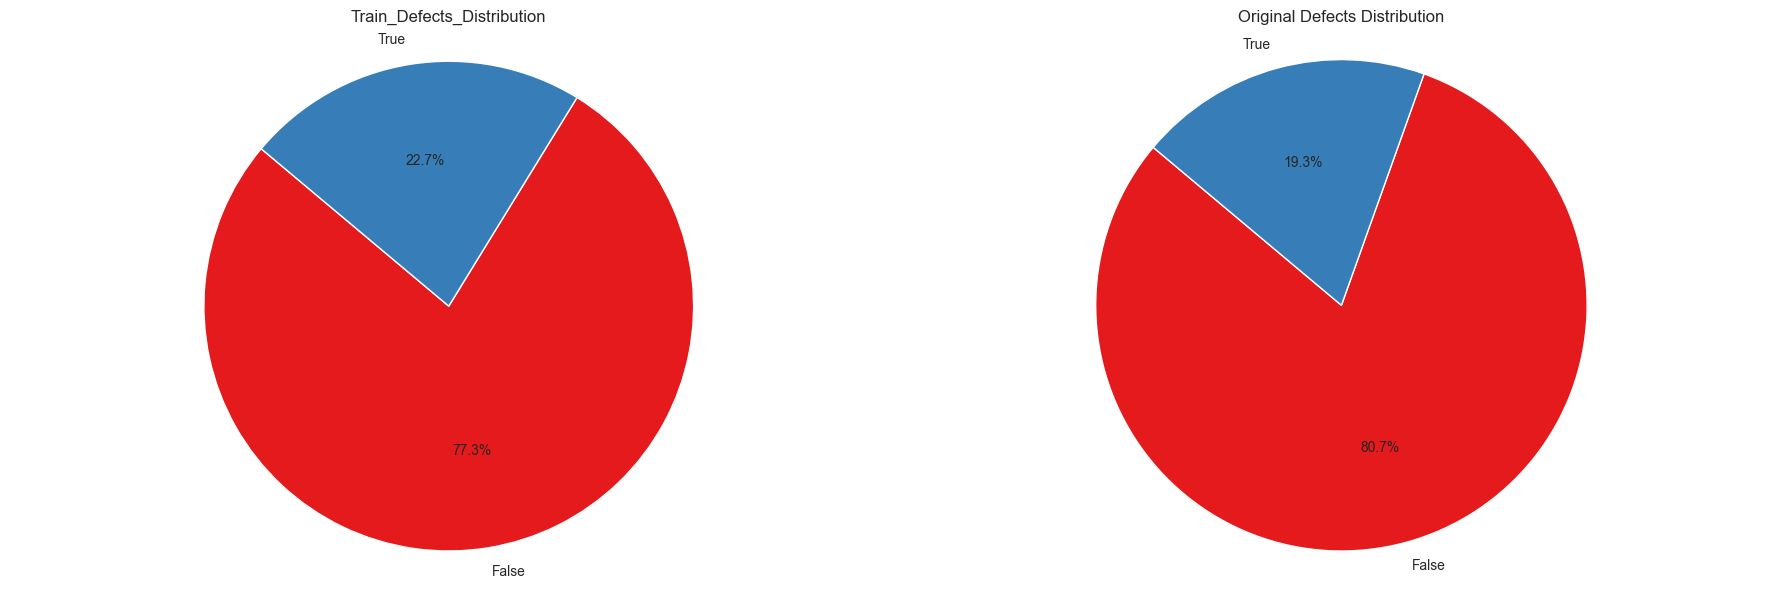

In [53]:
# EDA
# Check target distribution
def plot_pie_chart(data, title, ax):
    dataCounts = data['defects'].value_counts()
    # Category labels (features)
    labels = dataCounts.index
    sizes = dataCounts.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    # Ensure the pie chart looks like a circle
    ax.axis('equal')
    ax.set_title(title)


# Create 2 subplots in a row
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
plot_pie_chart(train_df, 'Train_Defects_Distribution', axes[0])
plot_pie_chart(original_df, 'Original Defects Distribution', axes[1])
plt.tight_layout()
plt.show()

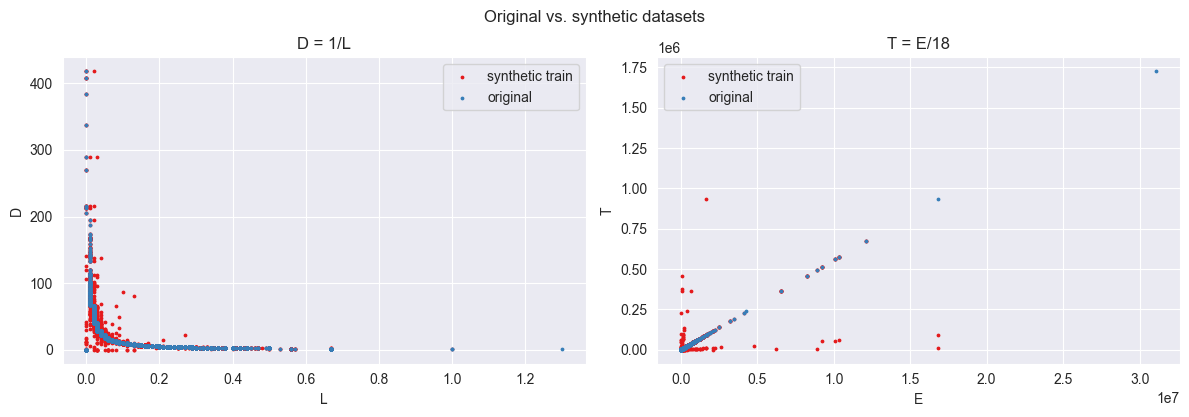

In [54]:
from matplotlib.ticker import PercentFormatter

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.scatter(train_df.l, train_df.d, s=3, label='synthetic train')
ax1.scatter(original_df.l, original_df.d, s=3, label='original')
ax1.set_xlabel('L')
ax1.set_ylabel('D')
ax1.set_title('D = 1/L')
ax1.legend()
ax2.scatter(train_df.e, train_df.t, s=3, label='synthetic train')
ax2.scatter(original_df.e, original_df.t, s=3, label='original')
ax2.set_xlabel('E')
ax2.set_ylabel('T')
ax2.set_title('T = E/18')
ax2.legend()

plt.tight_layout()
plt.suptitle('Original vs. synthetic datasets', y=1.03)
plt.show()

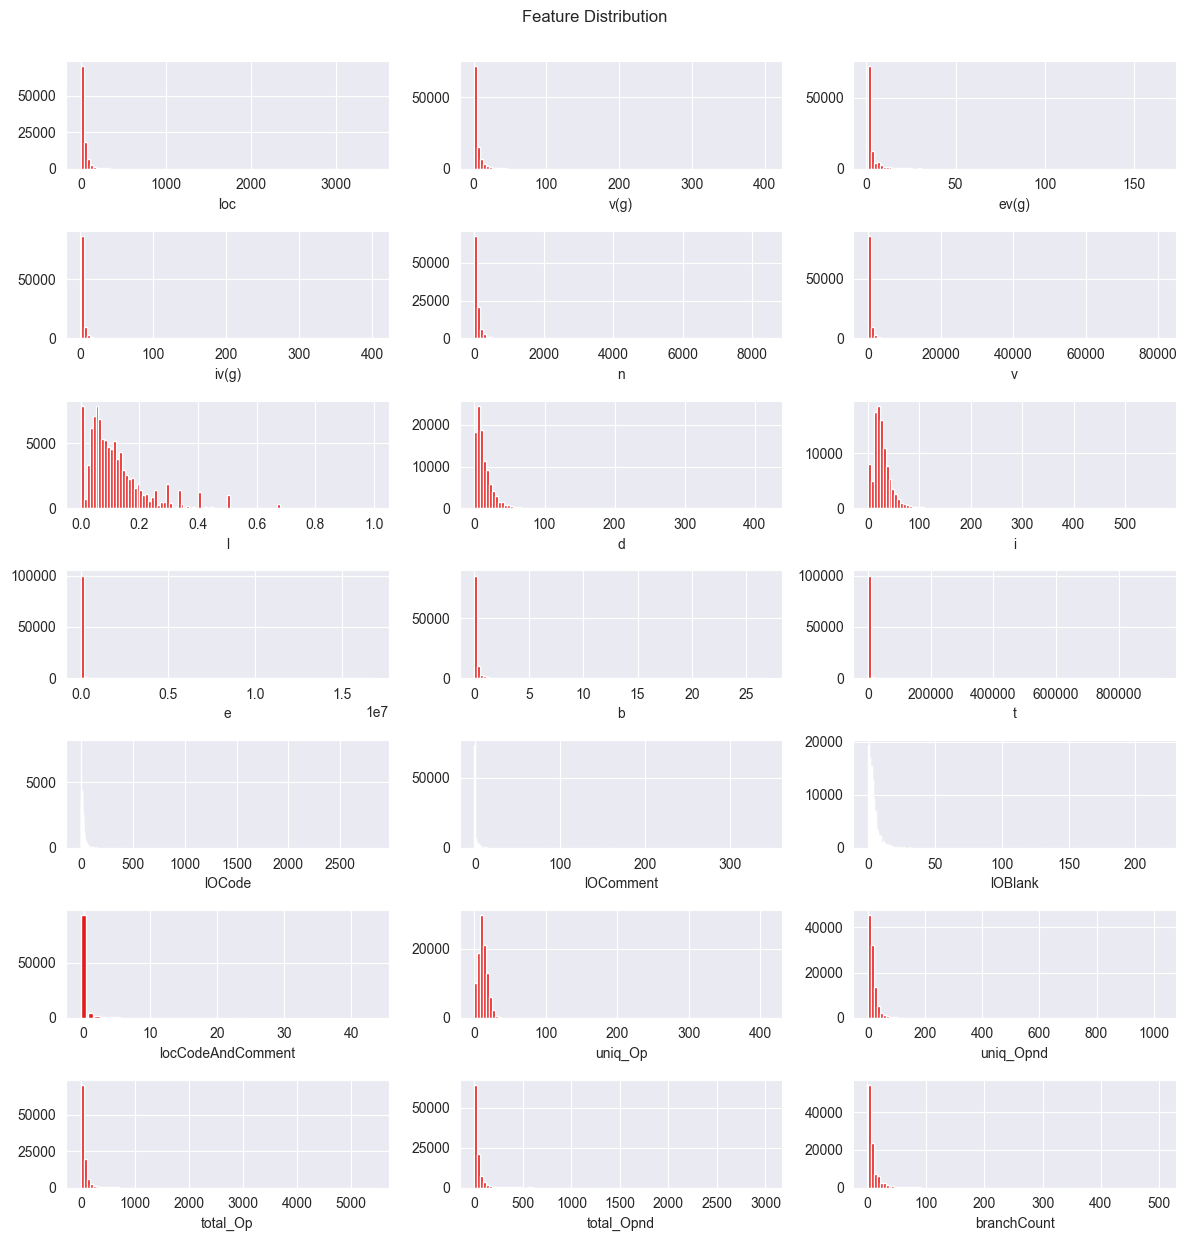

In [56]:
# Drawing Histograms for checking the distribution of numeric features (21)
fig, axes = plt.subplots(7, 3, figsize=(12, 12))
for col, ax in zip(train_df.columns, axes.ravel()):
    # only two data types in dataset: float and int
    if train_df[col].dtype == float:
        ax.hist(train_df[col], bins=100)
    else:
        counts = train_df[col].value_counts()
        ax.bar(counts.index, counts)
    ax.set_xlabel(col)

plt.tight_layout()
plt.suptitle('Feature Distribution', y=1.03)
plt.show()

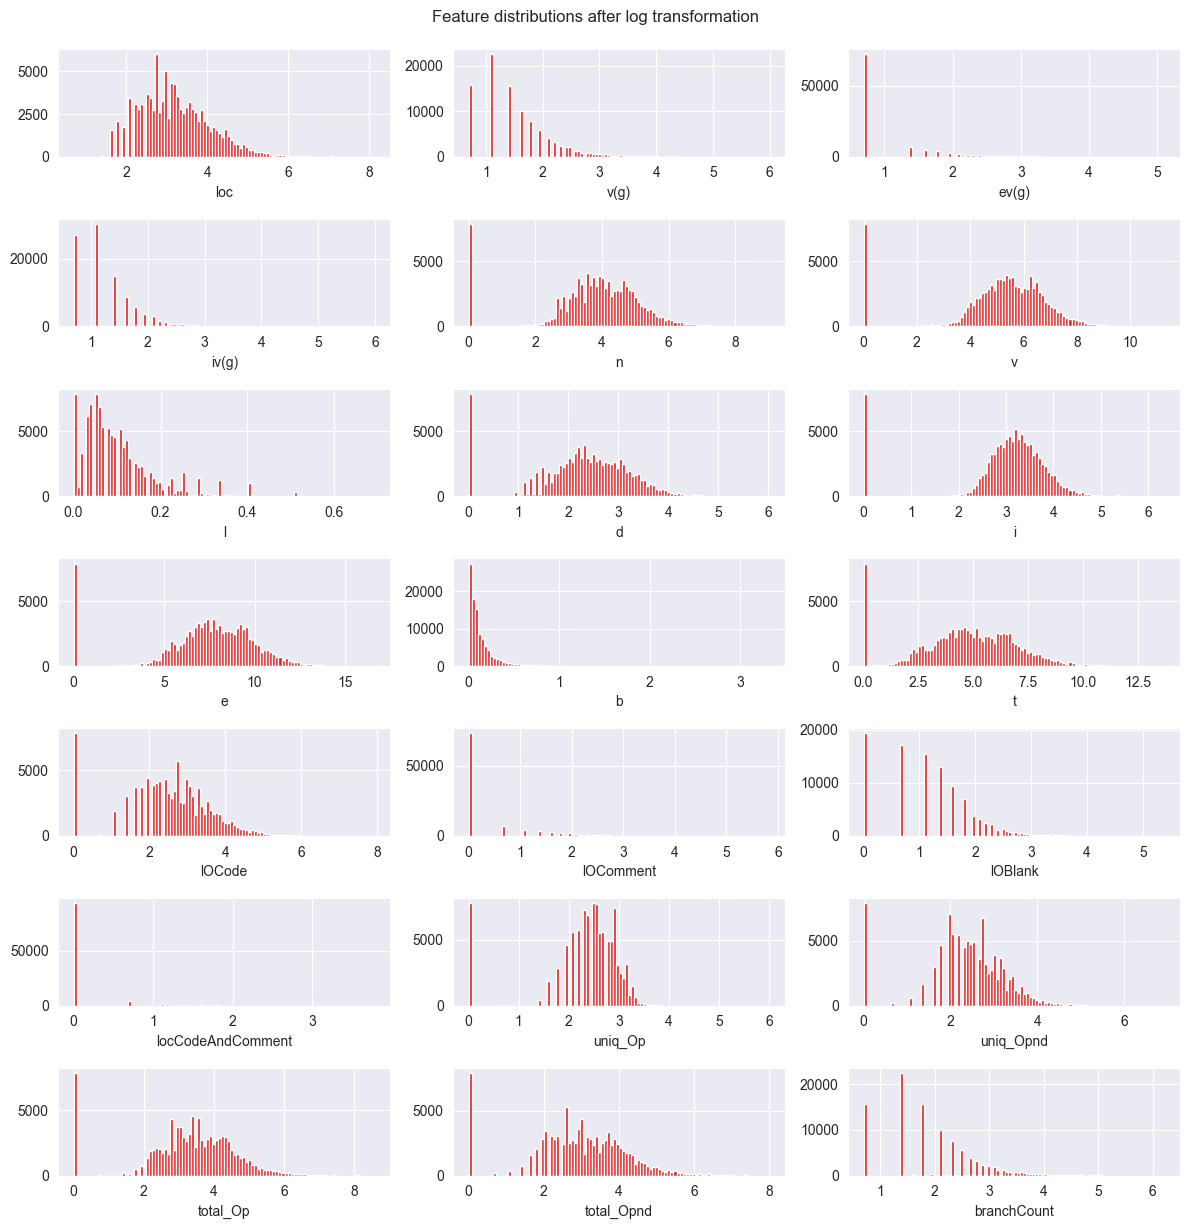

In [58]:
# Drawing Histograms for checking the changed distribution of numeric features (21)
fig, axes = plt.subplots(7, 3, figsize=(12, 12))
for col, ax in zip(train_df.columns, axes.ravel()):
    ax.hist(np.log1p(train_df[col]), bins=100)
    ax.set_xlabel(col)
plt.tight_layout()
plt.suptitle('Feature distributions after log transformation', y=1.02)
plt.show()

In [59]:
X_train = train_df.drop('defects', axis=1)
Y_train = train_df['defects']

In [60]:
# Train with Logistic Regression and Random Forest
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

# K-fold cross validation, where k = 10
# CV: Choose how many parts to split the data for each test
# Use roc auc score for evaluation (competition required)
lr_scores = cross_val_score(logreg, X_train, Y_train, cv=10, scoring = "roc_auc")

print("LogisticRegression Scores:", lr_scores)
print("LogisticRegression Mean:", lr_scores.mean())
print("LogisticRegression Standard Deviation:", lr_scores.std())

LogisticRegression Scores: [0.62758507 0.59373037 0.61570569 0.6303195  0.6265847  0.63543323
 0.62679177 0.61577923 0.63247856 0.6208783 ]
LogisticRegression Mean: 0.6225286430167147
LogisticRegression Standard Deviation: 0.011448106024018094


In [66]:
id = test_df['id']
test_df.drop(columns='id', inplace=True)

In [71]:
test_df.shape

(67842, 21)

In [72]:
y_pred = logreg.predict_proba(test_df)[:, 1]
submission_df = pd.DataFrame({"id": id, "defects": y_pred})
#submission = pd.Series(y_pred, index=test_df.id, name='defects')
submission_df.to_csv(r"Dataset/SoftwareDefectDataset/baselineSubmission.csv", encoding="utf8",index=False)

ValueError: Data must be 1-dimensional